In [79]:
import pandas as pd
import seaborn as sns 

In [80]:
distances = pd.read_csv("distances.csv")
distances['sensor2'] = distances['sensor2'].astype(int)
distances['sensor1'] = distances['sensor1'].astype(int)

#rename to 'first sensor'
distances['First Sensor'] = distances['sensor1']
distances['First Sensor'] += 1

distances['Second Sensor'] = distances['sensor2']
distances['Second Sensor'] += 1
distances = distances.drop(['sensor1', 'sensor2'], axis=1)

df_pivot = distances.pivot_table(index='First Sensor', columns='Second Sensor', values='euclidean_distance')


<AxesSubplot:xlabel='Second Sensor', ylabel='First Sensor'>

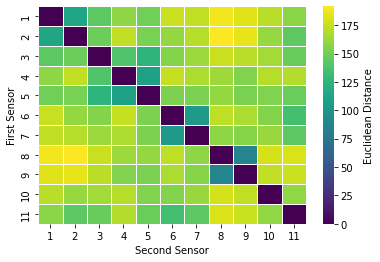

In [81]:
# Define the color palette
color_palette = sns.color_palette("viridis", as_cmap=True)

# Create the heatmap
sns.heatmap(df_pivot, cmap=color_palette, annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Euclidean Distance'})

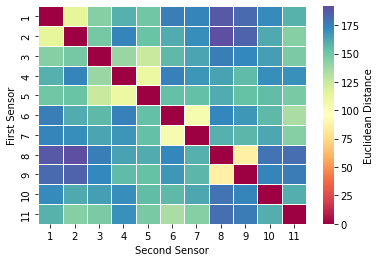

In [82]:

color_palette = sns.color_palette("Spectral", as_cmap=True)

# Create the heatmap
fig = sns.heatmap(df_pivot, cmap=color_palette, annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Euclidean Distance'}).get_figure()
fig.savefig("heatmap.png")
fig.savefig("heatmap.eps")


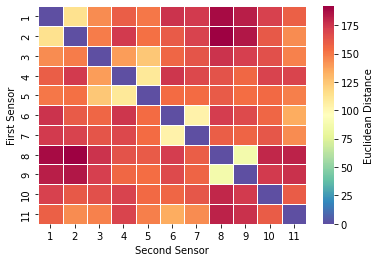

In [83]:
# Define the color palette
import matplotlib.colors as colors


color_palette = sns.color_palette("Spectral_r", as_cmap=True)


# # Invert the color palette
# inverted_palette =  reversed(list(color_palette))

# # Create a custom color map
# custom_cmap = colors.ListedColormap(inverted_palette)


# Create the heatmap
fig = sns.heatmap(df_pivot, cmap=color_palette, annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Euclidean Distance'}).get_figure()
fig.savefig("heatmap_reversed.png")
fig.savefig("heatmap_reversed.eps")


In [84]:
for i in range(1, 12):
    for j in range(1, 12): 
        if i == j:
            df_pivot[i][j] = None

In [89]:
for i in range(1, 12):
    for j in range(1, 12): 
        if i == j:
            distances.loc[(distances['First Sensor'] == i) & (distances['Second Sensor'] == j), 'euclidean_distance'] = None

In [90]:
minimum_value = distances['euclidean_distance'].min()
first_quartile = distances['euclidean_distance'].quantile(0.25)
median_value = distances['euclidean_distance'].median()
third_quartile = distances['euclidean_distance'].quantile(0.75)
maximum_value = distances['euclidean_distance'].max()

distances_minimum = distances[distances['euclidean_distance'] == minimum_value]
distances_first_quartile = distances[distances['euclidean_distance'] < first_quartile]
distances_median = distances[distances['euclidean_distance'] == median_value]
distances_third_quartile = distances[distances['euclidean_distance'] > third_quartile]
distances_maximum = distances[distances['euclidean_distance'] == maximum_value]

distances_between_quartiles = distances[(distances['euclidean_distance'] > first_quartile) & (distances['euclidean_distance'] < third_quartile)]

In [88]:
furthest_sensors = distances_third_quartile[['First Sensor', 'Second Sensor']]
closest_sensors = distances_first_quartile[['First Sensor', 'Second Sensor']]
between_sensors = distances_between_quartiles[['First Sensor', 'Second Sensor']]
minimum_sensor = distances_minimum[['First Sensor', 'Second Sensor']]
maximum_sensor = distances_maximum[['First Sensor', 'Second Sensor']]
median_sensor = distances_median[['First Sensor', 'Second Sensor']]

furthest_sensors.to_csv('furthest_sensors.csv', index=False)
closest_sensors.to_csv('closest_sensors.csv', index=False)
between_sensors.to_csv('between_sensors.csv', index=False)
minimum_sensor.to_csv('minimum_sensors.csv', index=False)
maximum_sensor.to_csv('maximum_sensors.csv', index=False)
median_sensor.to_csv('median_sensors.csv', index=False)